Observation: The GMM using EM algorithm bas clustering matched the 
true labels more closely than the Kmeans.


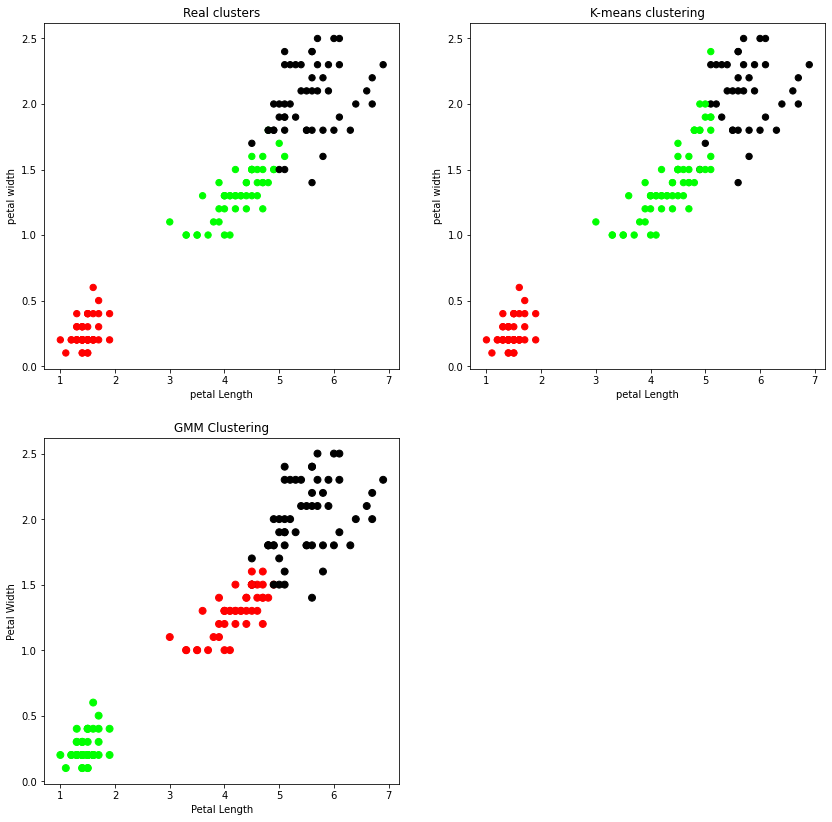

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']


#Building the K-means model
model=KMeans(n_clusters=3)
model.fit(X)

#visualising the clustering results
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])
#plot the original classifications using petal features
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real clusters')
plt.xlabel('petal Length')
plt.ylabel('petal width')
#plot the Models Classifications
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('K-means clustering')
plt.xlabel('petal Length')
plt.ylabel('petal width')

#General EM for GMM

from sklearn import preprocessing
# transform your data such that its distribution will have a mean value 0 and 
#standard deviation of 1. 
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)

from sklearn.mixture import GaussianMixture 
gmm=GaussianMixture (n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter (X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=48)
plt.title('GMM Clustering') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print("""Observation: The GMM using EM algorithm bas clustering matched the 
true labels more closely than the Kmeans.""")